In [26]:
import numpy as np 
import os 
import pandas as pd 

In [14]:
test_pred_prob = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/Pipeline_CNN/2019-06-28_17-30-41'
                                         , 'predictions.out'), delimiter=',')

test_classes = np.loadtxt(os.path.join('/home/karim/Documents/research/experiments_results/Pipeline_CNN/2019-06-28_17-30-41',
                                       'test_ground_truth_classes.txt'), delimiter=',')

In [47]:
test_pred = np.round(test_pred_prob)
LABELS_LIST = ['car', 'chill', 'club', 'dance', 'gym', 'happy', 'night', 'party', 'relax', 'running',
               'sad', 'sleep', 'summer', 'work', 'workout']

In [49]:
accuracies_perclass = sum(test_pred == test_classes) / len(test_classes)
accuracies_df = pd.DataFrame(columns= LABELS_LIST)
accuracies_df.index.astype(str, copy = False)
accuracies_df.loc[0] = accuracies_perclass

In [50]:
percentage_of_positives_perclass = sum(test_classes) / len(test_classes)
accuracies_df.loc[1] = percentage_of_positives_perclass
accuracies_df.index = ['Model Accuracy' , 'Ratio of Positive Samples']

In [54]:
accuracies_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
Model Accuracy,0.549582,0.542638,0.533114,0.684529,0.528485,0.602991,0.526171,0.528752,0.586256,0.569877,0.637084,0.659783,0.581449,0.524657,0.603792
Ratio of Positive Samples,0.449973,0.683194,0.401994,0.633612,0.472761,0.396386,0.474453,0.628538,0.422557,0.449083,0.396208,0.398878,0.527061,0.474275,0.398433


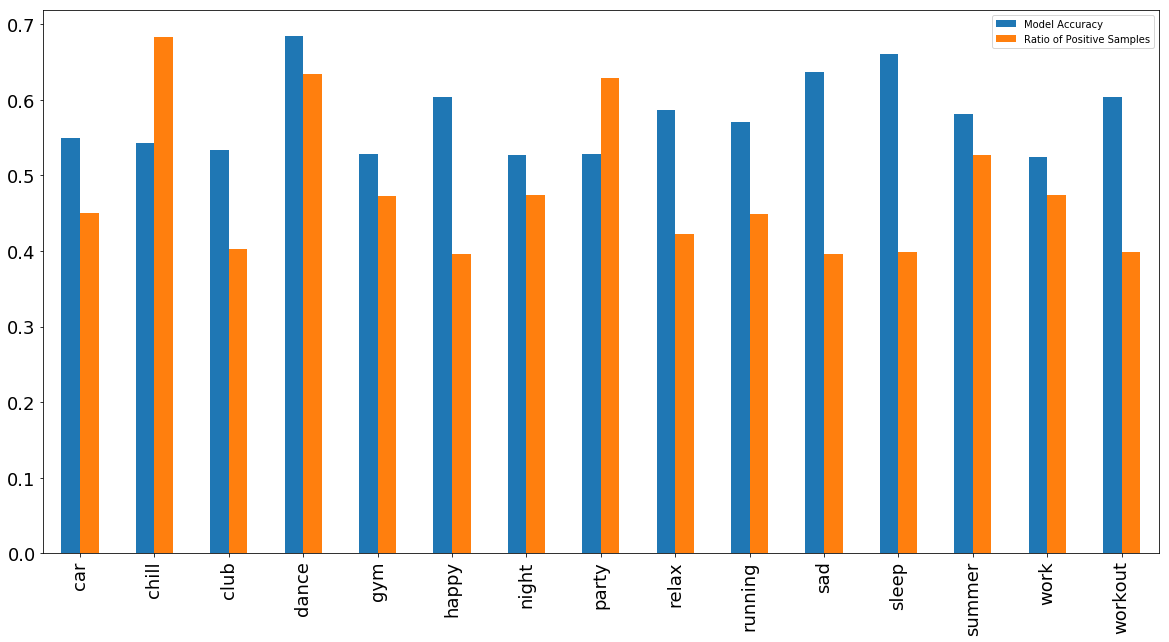

In [60]:
accuracies_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [79]:
true_positives_ratio_perclass = sum((test_pred == test_classes) *  (test_classes == 1)) / sum(test_classes)
true_positives_ratio_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_ratio_df.index.astype(str, copy = False)
true_positives_ratio_df.loc[0] = true_positives_ratio_perclass
true_positives_ratio_df

,car,chill,club,dance,gym,happy,night,party,relax,running,sad,sleep,summer,work,workout
0,0.003165,0.51114,0.937334,0.93664,0.004142,0.008758,0.160038,0.388755,0.10533,0.160357,0.156819,0.225396,0.689242,0.005818,0.012288


In [80]:
true_positives_perclass = sum((test_pred == test_classes) *  (test_classes == 1))
true_positives_df = pd.DataFrame(columns= LABELS_LIST)
true_positives_df.index.astype(str, copy = False)
true_positives_df.loc[0] = true_positives_perclass

percentage_of_positives_perclass = sum(test_classes)
true_positives_df.loc[1] = percentage_of_positives_perclass
true_positives_df.index = ['True Positives' , 'Positive Samples']

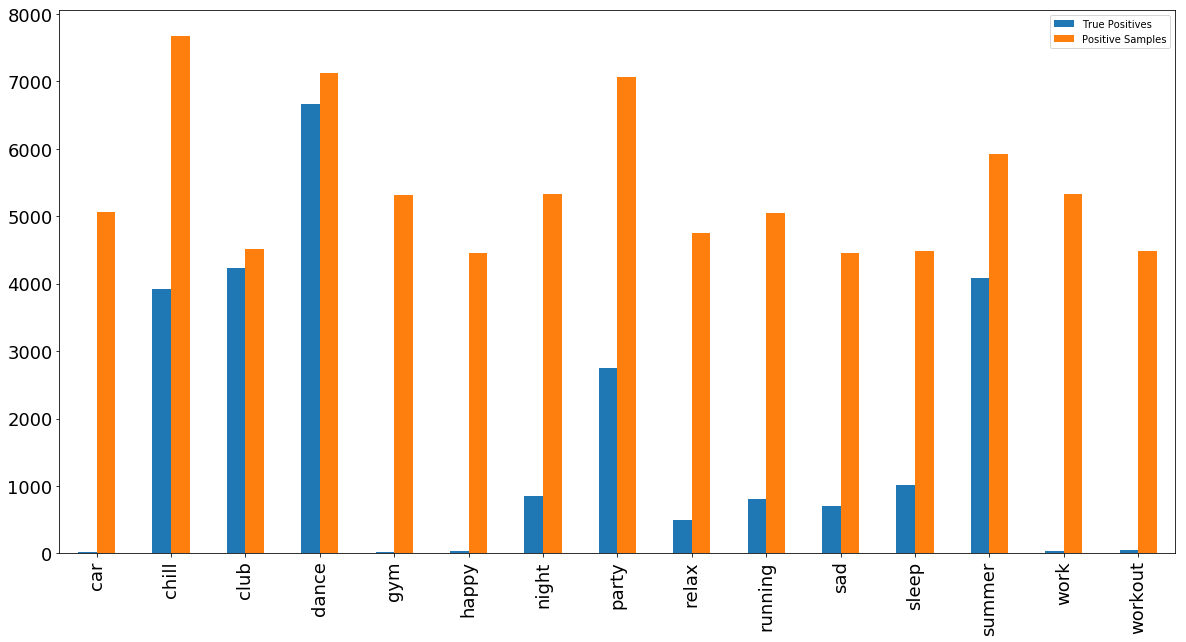

In [82]:
true_positives_df.T.plot.bar(figsize=(20,10),fontsize = 18)


In [83]:
# Getting coocuarances
test_pred_df = pd.DataFrame(test_pred,columns=LABELS_LIST)
coocurrances = pd.DataFrame(columns=test_pred_df.columns)
for column in test_pred_df.columns:
    coocurrances[column] = test_pred_df[test_pred_df[column] == 1 ].sum()
coocurrances = coocurrances.T

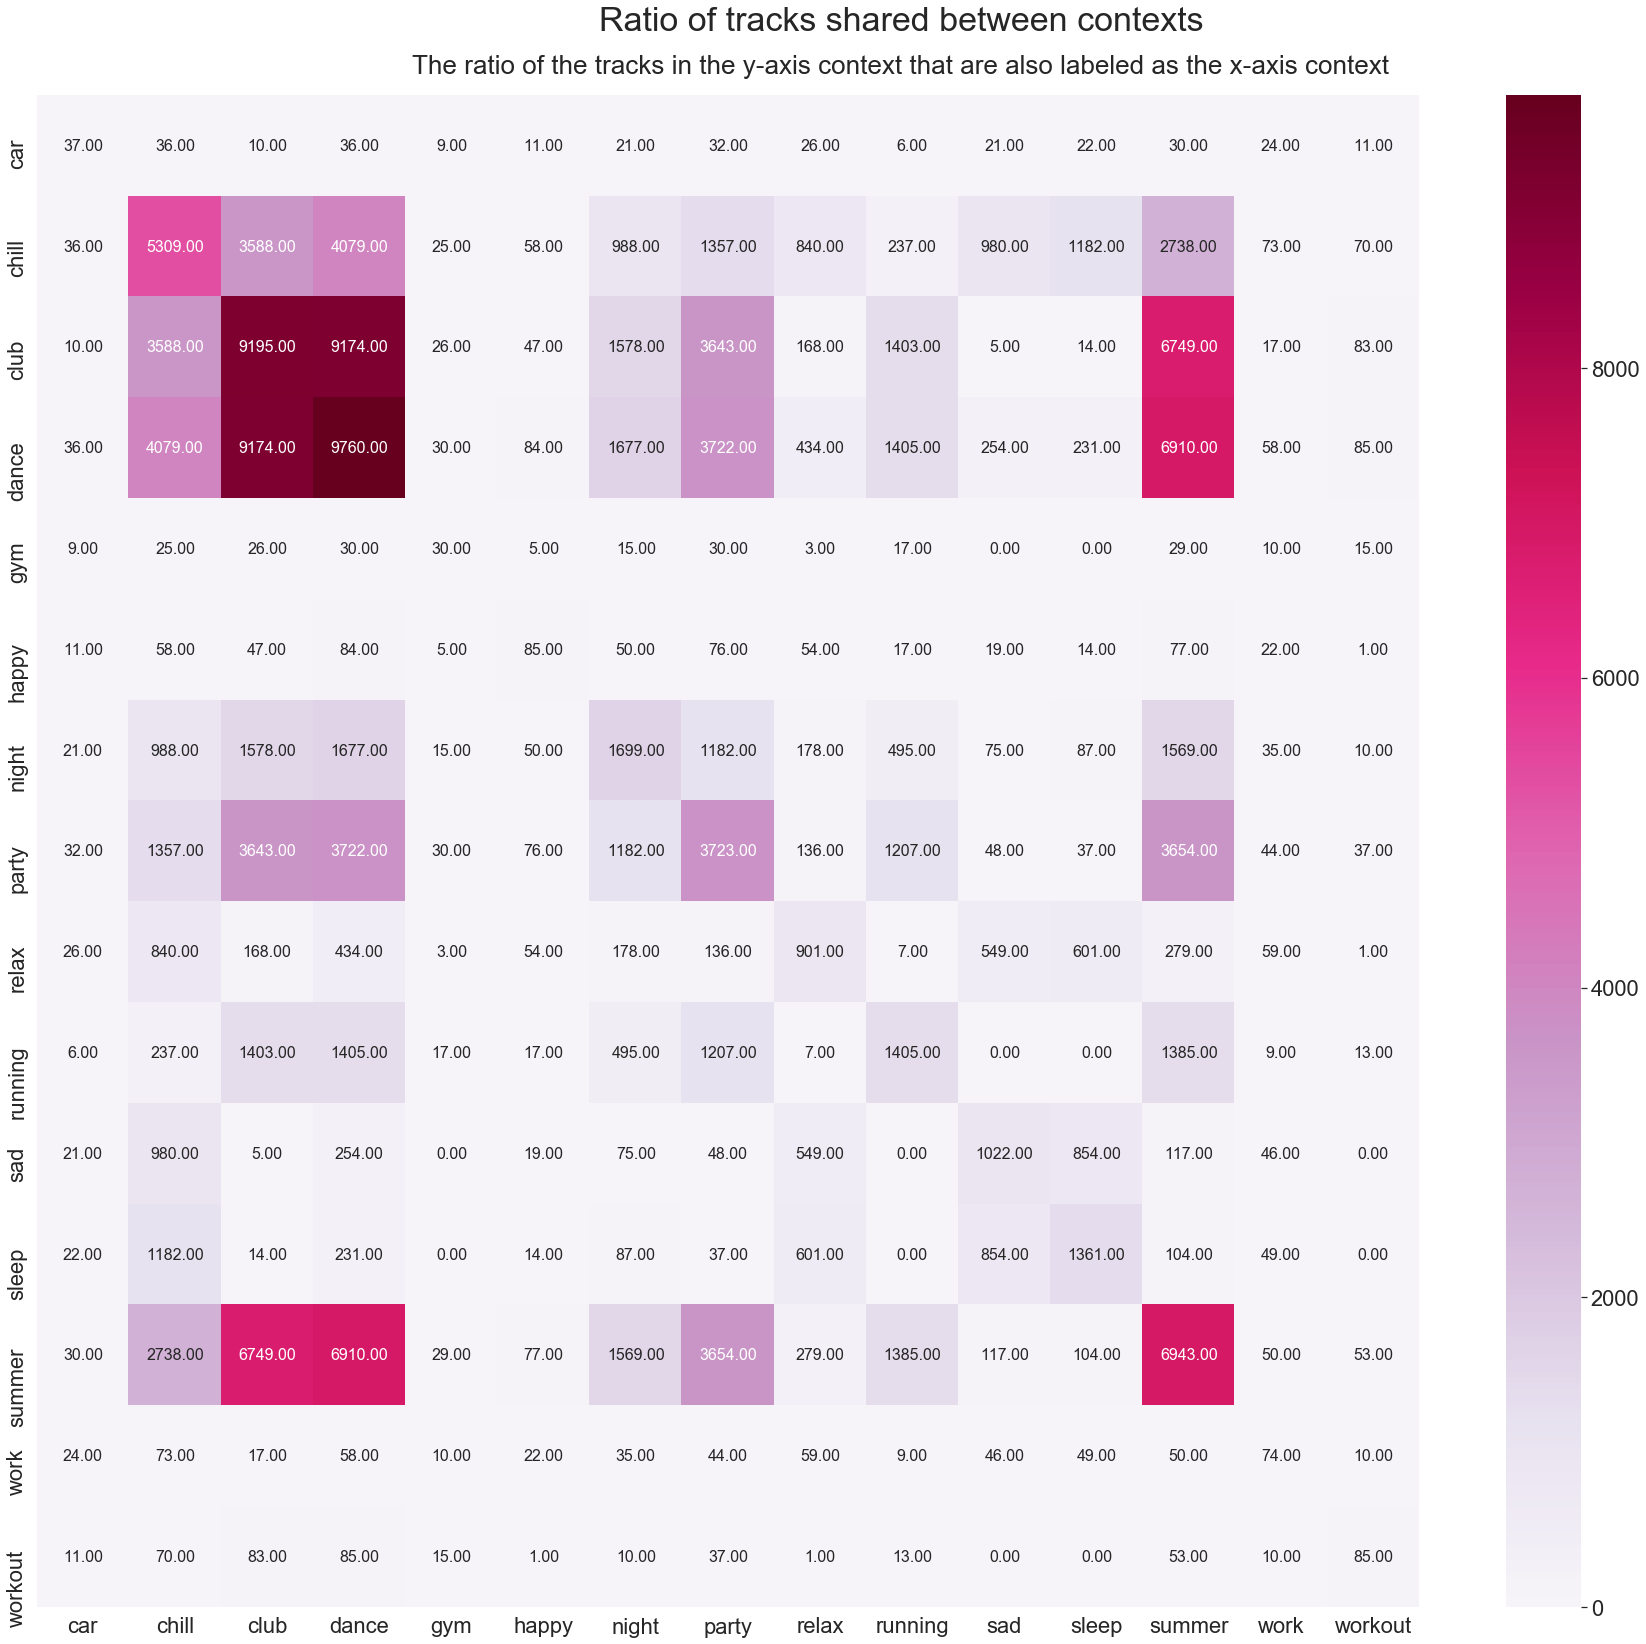

In [86]:
# Plotting coocurances
import seaborn as sn
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,30));
sn.set(font_scale=2)#for label size
cmap = 'PuRd'
plt.axes([.1,.1,.8,.7])
plt.figtext(.5,.83,'Ratio of tracks shared between contexts', fontsize=34, ha='center')
plt.figtext(.5,.81,'The ratio of the tracks in the y-axis context that are also labeled as the x-axis context',fontsize=26,ha='center')
#plt.title("Ratio of tracks shared between contexts",fontdict={"fontsize" : 40})
#plt.suptitle("Numbers show the ratio of the tracks in the y-axis context that are also labeled as the x-axis context")
sn.heatmap(coocurrances, annot=True,annot_kws={"size": 16},fmt='.2f', cmap= cmap);